# Benchmarking GATR against other Methods

This notebook shows us how to compare mission plan attained by our replanner GATR verse other methods. We will showcase
- compare GATR against Random, LKH3 on a Large problem
- compare GATR against Random, LKH3 and Enumeration (the brute force method) on a Small problem

In [ ]:
import os
from types import SimpleNamespace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from graph_attention_replanner.config import (
    LogFileConfig,
    get_generator,
    get_env,
)

large_problem_setup_dict = {
    "num_task": 50,
    "num_agent": 10,
    "discretize_level": 2,
    "batch_size": 10,
    "seed": 0
}
large_problem_setup = SimpleNamespace(**large_problem_setup_dict)

small_problem_setup_dict = {
    "num_task": 3,
    "num_agent": 2,
    "discretize_level": 1,
    "batch_size": 10,
    "seed": 0
}
small_problem_setup = SimpleNamespace(**small_problem_setup_dict)

# Training
Here, we try to train 2 GATR models:
- One for the large problem setup
- One for the small problem setup

In [8]:
os.system(f"python ../method/gat/train.py --num_task {large_problem_setup.num_task} --num_agent {large_problem_setup.num_agent} --discretize_level {large_problem_setup.discretize_level} --num_node {large_problem_setup.num_task*large_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --train_data_size 1000 --val_data_size 100 --max_epochs 1 --seed {large_problem_setup.seed} --disable_wandb")

{'mtsp_problem_type': 5, 'num_node': 100, 'exact_num_node': False, 'num_task': 50, 'min_num_task': 50, 'max_num_task': 50, 'discretize_level': 2, 'min_discretize_level': 2, 'max_discretize_level': 2, 'num_agent': 10, 'min_num_agent': 10, 'max_num_agent': 10, 'batch_size': 10, 'device_id': 0, 'seed': 0, 'num_exp': 1, 'embed_dim': 128, 'num_encoder_layers': 8, 'num_heads': 4, 'train_data_size': 1000, 'val_data_size': 100, 'learning_rate': 1e-05, 'max_epochs': 1, 'algo': 'reinforce', 'disable_wandb': True}


Seed set to 0
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name                                   ┃ Type          ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ env                                    │ MTSPEnv_Type5 │      0 │ train │
│ 1  │ policy                                 │ AttentionMod… │  1.7 M │ train │
│ 2  │ policy.encoder                         │ AttentionMod… │  1.6 M │ train │
│ 3  │ policy.encoder.init_embedding          │ MTSPwithTLIn… │    896 │ train │
│ 4  │ policy.encoder.net                     │ GraphAttenti… │  1.6 M │ train │
│ 5  │ policy.decoder                         │ AttentionMod… │  115 K │ train │
│ 6  │ policy.decoder.context_embedding       │ MTSPContext   │ 33.3 K │ train │
│ 7  │ policy.decoder.dynamic_embedding       │ StaticEmbedd… │      0 │ train │
│ 8  │ policy.decoder.pointer                 │ PointerAtten… │ 16.4 K │ train │
│ 9  │ policy.decoder.projec

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 100/100 [04:44<00:00,  0.35it/s, v_num=18, train/reward=-374., train/loss=-9.86e+3]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 100/100 [05:03<00:00,  0.33it/s, v_num=18, train/reward=-374., train/loss=-9.86e+3, val/reward=-324.]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 100/100 [05:40<00:00,  0.29it/s, v_num=18, train/reward=-374., train/loss=-9.86e+3, val/reward=-324.]


0

In [20]:
os.system(f"python ../method/gat/train.py --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_task*small_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size {small_problem_setup.batch_size} --train_data_size 1000 --val_data_size 100 --max_epochs 1 --seed {small_problem_setup.seed} --disable_wandb")

{'mtsp_problem_type': 5, 'num_node': 3, 'exact_num_node': False, 'num_task': 3, 'min_num_task': 3, 'max_num_task': 3, 'discretize_level': 1, 'min_discretize_level': 1, 'max_discretize_level': 1, 'num_agent': 2, 'min_num_agent': 2, 'max_num_agent': 2, 'batch_size': 10, 'device_id': 0, 'seed': 0, 'num_exp': 1, 'embed_dim': 128, 'num_encoder_layers': 8, 'num_heads': 4, 'train_data_size': 1000, 'val_data_size': 100, 'learning_rate': 1e-05, 'max_epochs': 1, 'algo': 'reinforce', 'disable_wandb': True}


Seed set to 0
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃    ┃ Name                                   ┃ Type          ┃ Params ┃ Mode  ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0  │ env                                    │ MTSPEnv_Type5 │      0 │ train │
│ 1  │ policy                                 │ AttentionMod… │  1.7 M │ train │
│ 2  │ policy.encoder                         │ AttentionMod… │  1.6 M │ train │
│ 3  │ policy.encoder.init_embedding          │ MTSPwithTLIn… │    896 │ train │
│ 4  │ policy.encoder.net                     │ GraphAttenti… │  1.6 M │ train │
│ 5  │ policy.decoder                         │ AttentionMod… │  115 K │ train │
│ 6  │ policy.decoder.context_embedding       │ MTSPContext   │ 33.3 K │ train │
│ 7  │ policy.decoder.dynamic_embedding       │ StaticEmbedd… │      0 │ train │
│ 8  │ policy.decoder.pointer                 │ PointerAtten… │ 16.4 K │ train │
│ 9  │ policy.decoder.projec

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Epoch 0:   0%|          | 0/100 [00:00<?, ?it/s]                           

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 0: 100%|██████████| 100/100 [00:25<00:00,  3.89it/s, v_num=16, train/reward=-23.0, train/loss=2.040] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 0: 100%|██████████| 100/100 [00:27<00:00,  3.68it/s, v_num=16, train/reward=-23.0, train/loss=2.040, val/reward=-25.0]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 100/100 [00:29<00:00,  3.35it/s, v_num=16, train/reward=-23.0, train/loss=2.040, val/reward=-25.0]


0

# Generate Data
Generate 2 set of data, then convert these tensordicts into ATSP format for LKH3 solver.
- 10 instance of CMRPs with 50 tasks, 10 agents, 2 discretization levels.
- 10 instance of CMRPs with 5 tasks, 2 agents, 2 discretization levels.

In [3]:
os.system(f"python ../run/gen_data.py --num_task {large_problem_setup.num_task} --num_agent {large_problem_setup.num_agent} --discretize_level {large_problem_setup.discretize_level} --num_node {large_problem_setup.num_task*large_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

0

In [21]:
os.system(f"python ../run/gen_data.py --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_task*small_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

0

In [6]:
os.system(f"python ../run/gen_data_td2tsp.py --num_task {large_problem_setup.num_task} --num_agent {large_problem_setup.num_agent} --discretize_level {large_problem_setup.discretize_level} --num_node {large_problem_setup.num_task*large_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size {large_problem_setup.batch_size} --num_exp {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")

            [Depot LKH] [4.0|6.0] [4.0|6.0]  ...  [9.0|4.0]  [3.0|0.0]  [5.0|1.0]
[Depot LKH]         INF       INF       INF  ...        INF        INF        INF
[4.0|6.0]           INF       INF       INF  ...        INF        INF        INF
[4.0|6.0]           INF       INF       INF  ...        INF        INF        INF
[4.0|6.0]           INF       INF       INF  ...        INF        INF        INF
[4.0|6.0]           INF       INF       INF  ...        INF        INF        INF
...                 ...       ...       ...  ...        ...        ...        ...
[8.0|4.0]           INF  4.472136  4.472136  ...        3.5   9.403124    7.24264
[2.0|10.0]          INF  4.472136  4.472136  ...  11.719544  13.049875  12.486833
[9.0|4.0]           INF  5.385165  5.385165  ...        INF  10.211102        8.0
[3.0|0.0]           INF  6.082763  6.082763  ...   9.711102        INF   5.236068
[5.0|1.0]           INF   5.09902   5.09902  ...        7.5   5.236068        INF

[121 rows x 121

0

In [22]:
os.system(f"python ../run/gen_data_td2tsp.py --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_task*small_problem_setup.discretize_level} --mtsp_problem_type 5  --batch_size {small_problem_setup.batch_size} --num_exp {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")

            [Depot LKH] [4.0|6.0] [4.0|6.0]  ... [3.0|9.0] [5.0|8.0]  [1.0|8.0]
[Depot LKH]         INF       INF       INF  ...       INF       INF        INF
[4.0|6.0]           INF       INF       INF  ...       INF       INF        INF
[4.0|6.0]           INF       INF       INF  ...       INF       INF        INF
[9.0|7.0]           INF   5.09902       INF  ...  7.324555  9.123106  16.062258
[8.0|5.0]           INF       INF  4.123106  ...  7.403124   9.24264  15.615773
[3.0|9.0]           INF  3.162278  3.162278  ...       INF  7.236068  10.236068
[5.0|8.0]           INF  2.236068  2.236068  ...  3.236068       INF       12.0
[1.0|8.0]           INF  3.605551  3.605551  ...  3.236068       9.0        INF

[8 rows x 8 columns]
            [Depot LKH] [3.0|10.0] [3.0|10.0]  ... [6.0|2.0]  [6.0|4.0]  [6.0|4.0]
[Depot LKH]         INF        INF        INF  ...       INF        INF        INF
[3.0|10.0]          INF        INF        INF  ...       INF        INF        INF
[3.0|10.0

0

# Evaluation on the Large Problem (GATR, Random, LKH3)

In [2]:
os.system(f"python ../method/gat/eval_gat.py --method_mtsp_problem_type 5 --method_seed {large_problem_setup.seed} --num_task {large_problem_setup.num_task} --num_agent {large_problem_setup.num_agent} --discretize_level {large_problem_setup.discretize_level} --num_node {large_problem_setup.num_task*large_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {large_problem_setup.batch_size} --num_exp {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")

Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node100_task50to50_dislevel2to2_agent10to10_seed0_20250806102938/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node100_task50to50_dislevel2to2_agent10to10_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/gat/problem5_node100_task50to50_dislevel2to2_agent10to10_bs10_exp1_dataseed0_methodseed0.csv ...


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node100_task50to50_dislevel2to2_agent10to10_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 359.7393798828125 ± 124.25872802734375. 
Standard Error: 39.29405975341797
Avg Wall Time(s): 0.014424586296081543
------------------------------------------





0

In [5]:
os.system(f"python ../method/gat/eval_random.py --method_mtsp_problem_type 5 --method_seed {large_problem_setup.seed} --num_task {large_problem_setup.num_task} --num_agent {large_problem_setup.num_agent} --discretize_level {large_problem_setup.discretize_level} --num_node {large_problem_setup.num_task*large_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {large_problem_setup.batch_size} --num_exp {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")

Evaluating using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node100_task50to50_dislevel2to2_agent10to10_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/random/problem5_node100_task50to50_dislevel2to2_agent10to10_bs10_exp1_dataseed0.csv ...
Before transformation
tensor([[ 4.,  6.],
        [ 3.,  9.],
        [ 5.,  8.],
        [ 1.,  8.],
        [ 9.,  7.],
        [ 8.,  5.],
        [ 3., 10.],
        [ 6.,  2.],
        [ 6.,  4.],
        [ 6.,  4.],
        [ 2.,  2.],
        [ 2.,  2.],
        [ 6.,  8.],
        [ 9.,  6.],
        [ 9.,  0.],
        [10.,  5.],
        [ 1.,  2.],
        [ 4.,  8.],
        [ 1.,  8.],
        [ 7.,  0.],
        [10., 10.],
        [ 6.,  2.],
        [ 7.,  1.],
        [ 7.,  1.],
        [ 9.,  8.],
        [ 9.,  2.],
        [ 2.,  1.],
        [ 1.,  9.],
        [ 4.,  5.],
        [ 8.,  5.],
        [ 7., 10.],
        [ 7.,  6.],
        [ 8.,  4.],
  

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa




------------------------------------------
Avg Mission Time(s): 239.4837188720703 ± 8.75539493560791. 
Standard Error: 2.768698981082426
Avg Wall Time(s): 0.9809422731399536
------------------------------------------





0

In [8]:
os.system(f"python ../method/lkh/eval_lkh.py --method_mtsp_problem_type 5 --num_task {large_problem_setup.num_task} --num_agent {large_problem_setup.num_agent} --discretize_level {large_problem_setup.discretize_level} --num_node {large_problem_setup.num_task*large_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {large_problem_setup.batch_size} --num_exp {large_problem_setup.batch_size} --seed {large_problem_setup.seed}")




------------------------------------------
Avg Mission Time(s): 44.094190000000005
Avg Run Time(s): 8.54447362422943
------------------------------------------





0

# Evaluation on the Small Problem (GATR, Random, LKH3, Enumeration)

In [26]:
os.system(f"python ../method/gat/eval_gat.py --method_mtsp_problem_type 5 --method_seed {small_problem_setup.seed} --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_task*small_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {small_problem_setup.batch_size} --num_exp {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")

Evaluating model from /Users/ekwan/graph-attention-replanner/cache/checkpoints/algo_reinforce/problem5_node3_task3to3_dislevel1to1_agent2to2_seed0_20250806141941/epoch_epoch=000.ckpt using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node3_task3to3_dislevel1to1_agent2to2_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/gat/problem5_node3_task3to3_dislevel1to1_agent2to2_bs10_exp1_dataseed0_methodseed0.csv ...


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/lightning/pytorch/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['baseline.baseline.policy.encoder.init_embedding.init_embed.weight', 'baseline.baseline.policy.encoder.init_embedding.init_embed.bias', 'baseline.baseline.policy.encoder.init_embedding.init_embed_depot.weight', 'baseline.baselin

------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node3_task3to3_dislevel1to1_agent2to2_seed0_bs10.npz-------------



------------------------------------------
Avg Mission Time(s): 25.865585327148438 ± 4.712866306304932. 
Standard Error: 1.4903391599655151
Avg Wall Time(s): 0.002240109443664551
------------------------------------------





0

In [25]:
os.system(f"python ../method/gat/eval_random.py --method_mtsp_problem_type 5 --method_seed {small_problem_setup.seed} --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_task*small_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {small_problem_setup.batch_size} --num_exp {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")

Evaluating using data from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node3_task3to3_dislevel1to1_agent2to2_seed0_bs10.npz and saving results at /Users/ekwan/graph-attention-replanner/cache/results/random/problem5_node3_task3to3_dislevel1to1_agent2to2_bs10_exp1_dataseed0.csv ...
tensor([[9., 7.],
        [8., 5.]])
------------Loaded Dataset from /Users/ekwan/graph-attention-replanner/cache/data/general/problem5_node3_task3to3_dislevel1to1_agent2to2_seed0_bs10.npz-------------


/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa




------------------------------------------
Avg Mission Time(s): 31.88718032836914 ± 5.940814018249512. 
Standard Error: 1.8786503453125571
Avg Wall Time(s): 0.07996418476104736
------------------------------------------





0

In [24]:
os.system(f"python ../method/lkh/eval_lkh.py --method_mtsp_problem_type 5 --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_task*small_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {small_problem_setup.batch_size} --num_exp {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")




------------------------------------------
Avg Mission Time(s): 22.45993
Avg Run Time(s): 0.08532752990722656
------------------------------------------





0

In [23]:
os.system(f"python ../method/enumeration/eval_enum.py --method_mtsp_problem_type 5 --num_task {small_problem_setup.num_task} --num_agent {small_problem_setup.num_agent} --discretize_level {small_problem_setup.discretize_level} --num_node {small_problem_setup.num_task*small_problem_setup.discretize_level} --mtsp_problem_type 5 --batch_size {small_problem_setup.batch_size} --num_exp {small_problem_setup.batch_size} --seed {small_problem_setup.seed}")

Running experiment 1/10...
Initial Drone Locations:  [[9. 7.]
 [8. 5.]]
Task Locations:  [[3. 9.]
 [5. 8.]
 [1. 8.]]
Home Depot:  [[4. 6.]]
Task Times:  [1. 5. 8.]
Number of agents: 2
Number of nodes: 3
Number of tasks: 3
Discretize level: 1
Number of mission blueprints: 8
Finished running enumeration.
Running experiment 2/10...
Initial Drone Locations:  [[2. 2.]
 [2. 2.]]
Task Locations:  [[6. 2.]
 [6. 4.]
 [6. 4.]]
Home Depot:  [[ 3. 10.]]
Task Times:  [6. 7. 6.]
Number of agents: 2
Number of nodes: 3
Number of tasks: 3
Discretize level: 1
Number of mission blueprints: 8
Finished running enumeration.
Running experiment 3/10...
Initial Drone Locations:  [[1. 2.]
 [4. 8.]]
Task Locations:  [[ 9.  6.]
 [ 9.  0.]
 [10.  5.]]
Home Depot:  [[6. 8.]]
Task Times:  [6. 8. 2.]
Number of agents: 2
Number of nodes: 3
Number of tasks: 3
Discretize level: 1
Number of mission blueprints: 8
Finished running enumeration.
Running experiment 4/10...
Initial Drone Locations:  [[7. 1.]
 [7. 1.]]
Task Loc

Enumerating: 100%|██████████| 8/8 [00:00<00:00, 1644.74it/s]


0

# Visualize Results

In [2]:
def get_saved_data(setup, method="gat", type="result"):
    mtsp_problem_type=5
    num_node = setup.num_task * setup.discretize_level
    cfg = LogFileConfig(
            5,
            num_node,
            setup.num_task,
            setup.num_task,
            setup.discretize_level,
            setup.discretize_level,
            setup.num_agent,
            setup.num_agent,
            setup.batch_size,
            read_only=True,
        )
    if method == "gat" or method == "random":
        num_exp = 1
    else:
        num_exp = setup.batch_size

    if method == "gat":
        method_seed = setup.seed
    else:
        method_seed = None
    if type == "result":
        result_path = cfg.get_result_logfilename(
            seed=setup.seed,
            method_seed=method_seed,
            method=method,
            format="csv",
            num_exp=num_exp,
            override_mtsp_problem_type=mtsp_problem_type,
        )
        return result_path
    elif type == "data":
        data_path = cfg.get_data_logfilename(
            seed=setup.seed, format="npz", override_mtsp_problem_type=5
        )
        return data_path
    else:
        raise ValueError("Invalid type specified. Use 'result' or 'data'.")

df_list = []

path = get_saved_data(large_problem_setup, method="gat", type="result")
df = pd.read_csv(path)
df["Method"] = "GATR"
df["Problem"] = "Large"
df_list.append(df)

path = get_saved_data(large_problem_setup, method="random", type="result")
df = pd.read_csv(path)
df["Method"] = "Random"
df["Problem"] = "Large"
df_list.append(df)

path = get_saved_data(large_problem_setup, method="lkh", type="result")
df = pd.read_csv(path)
df["Method"] = "LKH3"
df["Problem"] = "Large"
df_list.append(df)


path = get_saved_data(small_problem_setup, method="gat", type="result")
df = pd.read_csv(path)
df["Method"] = "GATR"
df["Problem"] = "Small"
df_list.append(df)

path = get_saved_data(small_problem_setup, method="random", type="result")
df = pd.read_csv(path)
df["Method"] = "Random"
df["Problem"] = "Small"
df_list.append(df)

path = get_saved_data(small_problem_setup, method="lkh", type="result")
df = pd.read_csv(path)
df["Method"] = "LKH3"
df["Problem"] = "Small"
df_list.append(df)

path = get_saved_data(small_problem_setup, method="enum", type="result")
df = pd.read_csv(path)
df["Method"] = "Enumeration"
df["Problem"] = "Small"
df_list.append(df)

MERGED_DF = pd.concat(df_list, ignore_index=True)

# Group and aggregate
agg_df = MERGED_DF.groupby(["Problem", "Method"]).agg({
    "mission_time": lambda x: round(x.mean(), 2),
    "runtime": lambda x: round(x.mean(), 6)
})

# Format values as strings
agg_df["result"] = agg_df.apply(
    lambda row: f"mission time: {row['mission_time']}s runtime: {row['runtime']}s", axis=1
)

# Pivot into final table format
pivot_df = agg_df["result"].unstack(fill_value="NA")

# Reorder rows and columns
row_order = ["Large", "Small"]
col_order = ["GATR", "Random", "LKH3", "Enumeration"]
pivot_df = pivot_df.reindex(index=row_order, columns=col_order)
pivot_df


Method,GATR,Random,LKH3,Enumeration
Problem,,,,
Large,mission time: 359.74s runtime: 0.014425s,mission time: 239.48s runtime: 0.980942s,mission time: 44.09s runtime: 8.544474s,NA
Small,mission time: 25.87s runtime: 0.00224s,mission time: 31.89s runtime: 0.079964s,mission time: 22.46s runtime: 0.085328s,mission time: 22.36s runtime: 0.00778s


In [3]:
def visualize_action(setup, method="gat", exp_num=2, ax=None):
    num_node = setup.num_task * setup.discretize_level
    generator = get_generator(5)(
        num_node=num_node,
        min_num_task=setup.num_task,
        max_num_task=setup.num_task,
        min_discretize_level=setup.discretize_level,
        max_discretize_level=setup.discretize_level,
        min_num_agent=setup.num_agent,
        max_num_agent=setup.num_agent,
        seed=setup.seed,
    )
    env = get_env(5)(generator)

    path = get_saved_data(setup, method, type="result")
    df = pd.read_csv(path).iloc[exp_num]
    action_str = df["tour"]

    if method == "gat" or method == "random":
        action = np.array([int(x) for x in action_str.strip('[]').split(',')])
    elif method == "lkh":
        action = lkh2gattour(
            action_str,
            setup.num_task,
            setup.num_agent,
            num_node,
        )
    elif method == "enum":
        action = enum2gattour(
            action_str,
            setup.num_task,
            setup.num_agent,
            num_node,
        )
    else:
        raise ValueError(f"Unknown method: {method}")

    reward = df["mission_time"]
    path = get_saved_data(setup, method, type="data")
    td = env.load_data(path, batch_size=setup.batch_size)
    env.render(
        td[exp_num], action, reward=reward, visualize_task_not_splitted=False, ax=ax
    )

def remove_consecutive_zeros(arr):
    result = []
    zero_count = 0
    for num in arr:
        if num == 0:
            if zero_count == 0:
                result.append(0)
            zero_count += 1
        else:
            result.append(num)
            zero_count = 0    
    return result

def lkh2gattour(lkh_tour, num_task, num_agent, num_node):
    # virtual home 0, home 1 to 1+num_agent, start_loc 2 to 2+num_agent, subtask
    lkh_tour = ast.literal_eval(lkh_tour)
    num_node_incl_home = num_node + 1
    discretize_level = int(num_node/num_task)
    lkh2gat = [None] # virtual home 0
    lkh2gat.extend([0]*num_agent) 
    for i in range(num_agent):
        lkh2gat.extend([num_node_incl_home+i])
    for i in range(discretize_level):
        lkh2gat.extend(list(np.arange(1, num_task+1)))
    tour = []
    for agent_idx, agent_tour in enumerate(lkh_tour):
        agent_tour = [lkh2gat[i] for i in agent_tour]
        tour.extend(agent_tour)
        if agent_idx < num_agent - 1:
            tour.append(0)
    # Remove None
    tour = [x for x in tour if x is not None]
    tour = remove_consecutive_zeros(tour)
    tour = tour[:-1] # remove ending zero
    return tour

def enum2gattour(enum_tour, num_task, num_agent, num_node):
    enum_tour = ast.literal_eval(enum_tour)
    num_node_incl_home = num_node + 1
    enum_tour = np.array(enum_tour) # pick the tour
    num_agent = enum_tour.shape[0]
    tour = []
    start_loc_node = list(np.arange(num_node_incl_home, num_node_incl_home+num_agent))
    for agent_idx, agent_tour in enumerate(enum_tour):
        tour.append(start_loc_node[agent_idx])
        non_zero = np.count_nonzero(agent_tour)
        agent_tour[agent_tour == 0] = 999 # replace 0 with 999
        # print(f"agent_tour: {agent_tour}")
        at = np.argsort(agent_tour) + 1 # add 1 because 0 is depot
        at = at[:non_zero]
        tour.append(list(at))
        if agent_idx < num_agent - 1: # last agent dont append 0.
            tour.append(0)

    # Flatten list of arrays
    flat = []
    for item in tour:
        if isinstance(item, list):
            flat.extend(np.concatenate(item).tolist())
        else:
            flat.append(item)

    flat_array = np.array(flat)
    return flat_array

/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The BoundedTensorSpec has been deprecated and will be removed in v0.8. Please use Bounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedDiscreteTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The UnboundedContinuousTensorSpec has been deprecated and will be removed in v0.8. Please use Unbounded instead.
  warnings.warn(
/Users/ekwan/graph-attention-replanner/.venv/lib/python3.10/site-packages/torchrl/data/tensor_specs.py:6911: DeprecationWarning: The CompositeSpec has been deprecated and will be removed in v0.8. Please use Composite instead.
  warnings.wa

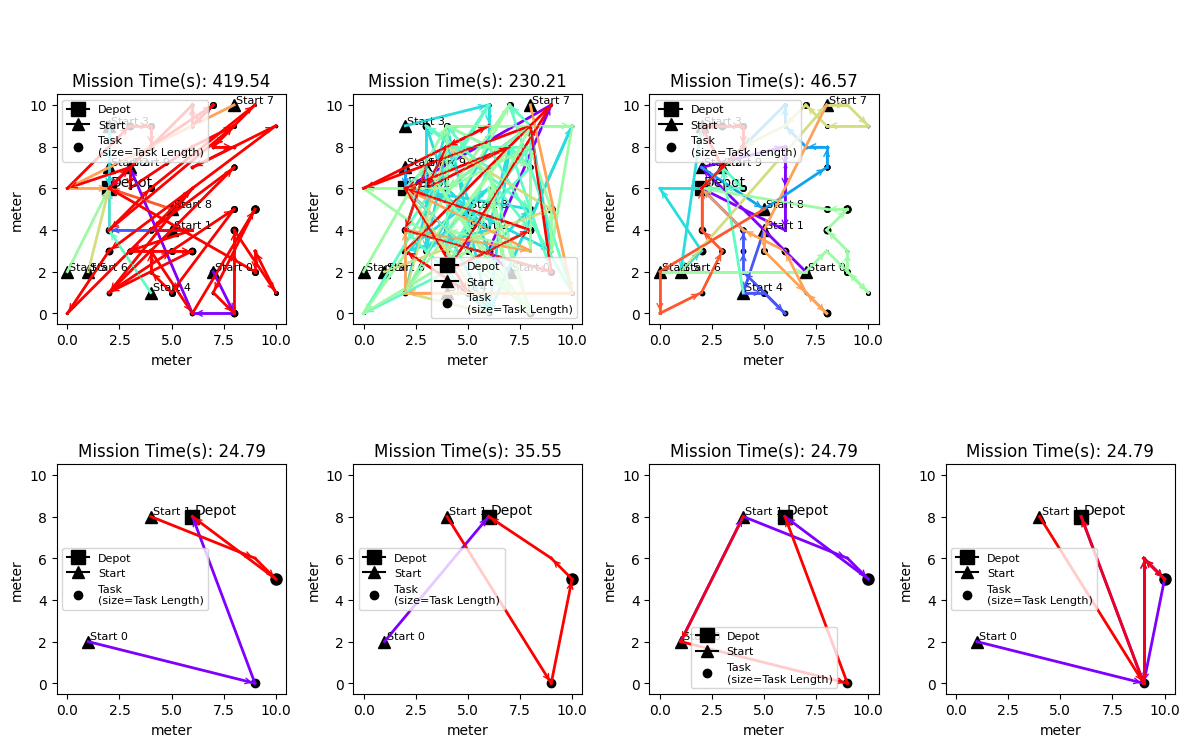

In [4]:
fig, ax = plt.subplots(2, 4, figsize=(12,8))
ax[0,3].axis('off')
visualize_action(large_problem_setup, method="gat", ax=ax[0,0])
visualize_action(large_problem_setup, method="random", ax=ax[0,1])
visualize_action(large_problem_setup, method="lkh", ax=ax[0,2])
visualize_action(small_problem_setup, method="gat", ax=ax[1,0])
visualize_action(small_problem_setup, method="random", ax=ax[1,1])
visualize_action(small_problem_setup, method="lkh", ax=ax[1,2])
visualize_action(small_problem_setup, method="enum", ax=ax[1,3])